# **로지스틱 회귀**</br>
로지스틱 회귀는 분류에 사용되는 기법으로 S자 함수를 사용하여 참(True: 0)과 거짓(False: 1)을 분류함: **이진 분류(Binary Classification)**

## **Why 로지스틱 회귀를 사용하는가?**

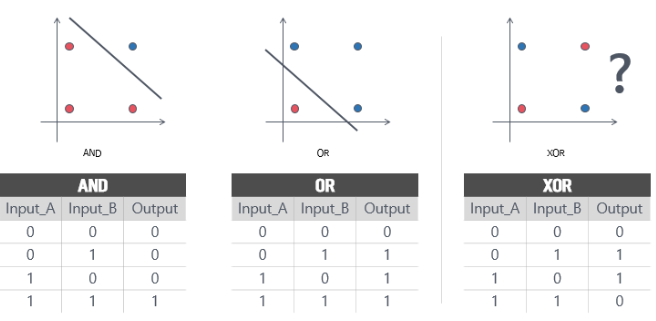

## **활성화 함수**: **시그모이드(sigmoid) 함수**

*  활성화 함수를 사용하면 입력값에 대한 출력값을 비선형시스템으로 만들 수 있음
*  즉 선형분류기를 비선형 시스템으로 만들 수 있음

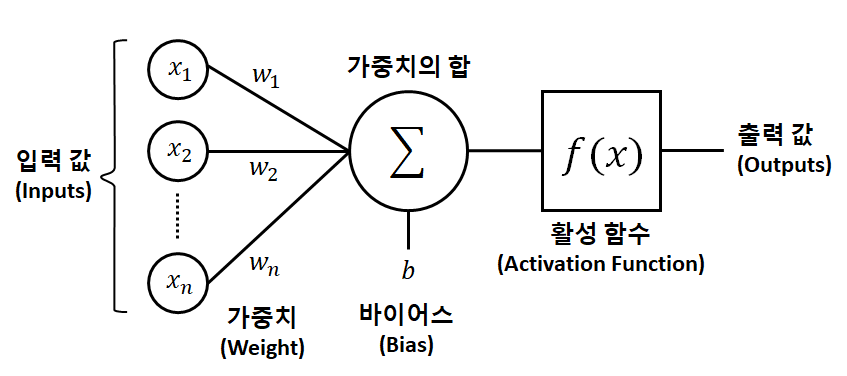

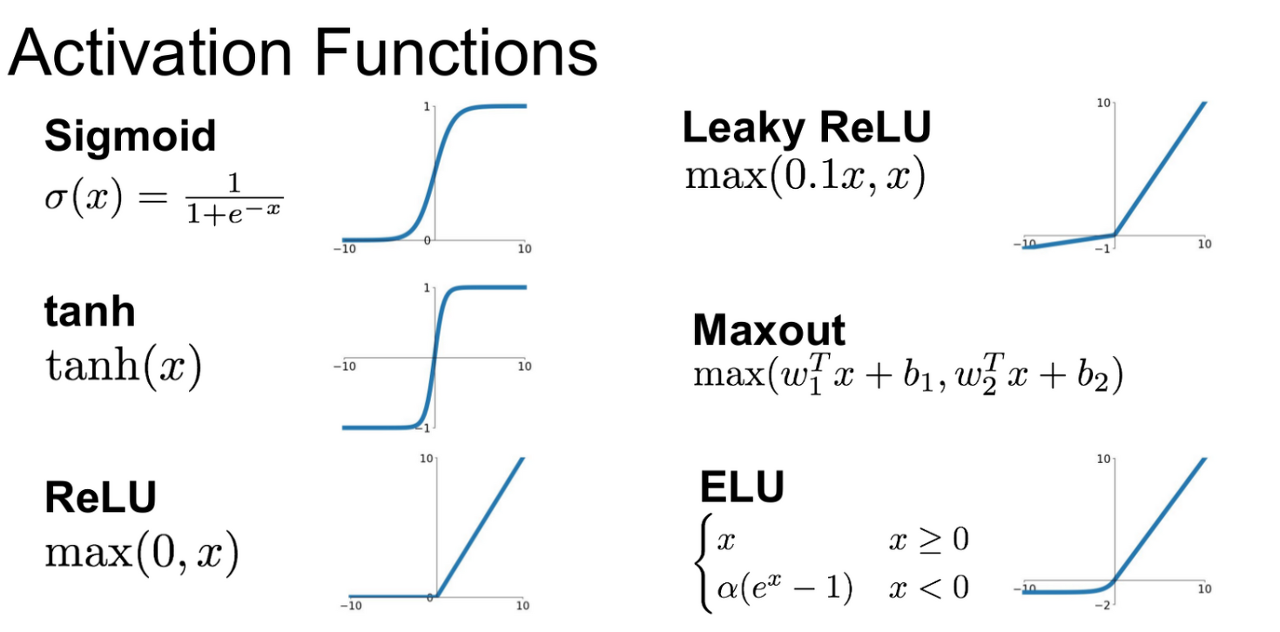

https://playground.tensorflow.org

## **이진 분류 성능평가**

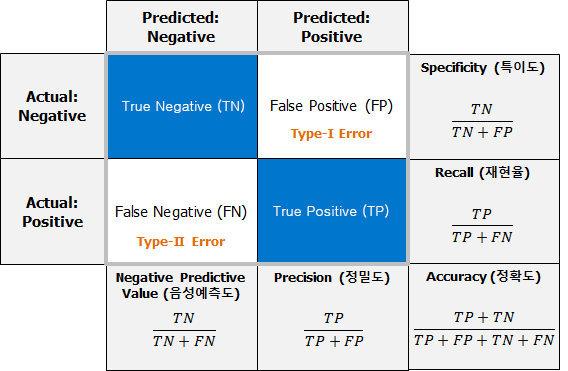

* **정확도(Accuracy)**: **예측 결과와 실제값이 동일한 건수(TP + TN) / 전체 데이터 수 (TP + FP + TN + FN)**
* **정밀도(Precision)**: **예측이 Postitive인 것(FP + TP) 중에서 참인 것의 비율(TP)**
* **재현율**: **실제 Positive 인것(FN + TP) 중에서 참인 것(TP)의 비율을 의미함**. 실제 Positive인 데이터를 정확히 예측했는지 평가하는 지표로 민감도(Sensitivity) **TPR(True Positive Rate)** 라고 함
* 특이도(Specificity): Negative을 진단(TN)하기 위해 잘 작동하는지 나타내는 지표
* **FI 스코어**: **F1 스코어는 정밀도와 재현율을 결합한 평가 지표**로 정밀도와 재현율이 서로 트레이트 오프관계(상충관계)인 문제점을 고려하여 정확한 평가를 위해 많이 사용함. **정밀도와 재현율의 조화평균**
* **ROC(Receiver Operating Characteristic) 기반 AUC(Area under Curve) 스코어**: ROC는 오차 행렬의 FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선. **FPR(1-Specificity)**은 실제 Negative인 데이터를 Positive로 거짓으로 예측한 비율이고 TPR(재현율)은 실제 Positive인 데이터를 참으로 예측한 비율</br>
FPR = FP / (FP + TN)

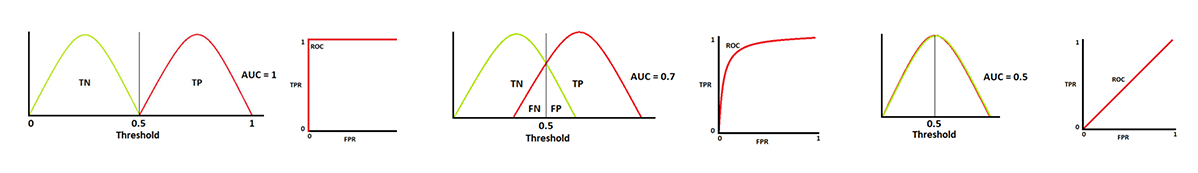

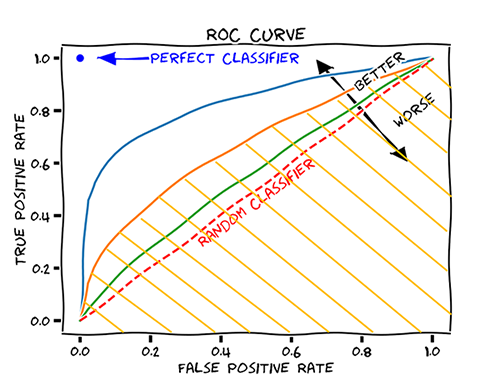

# **특징 데이터로 유방암 진단하기**

**종속변수: 'diagnosis'**</br>
M은 Malignant(악성: 1), B는 Benign(양성: 0)이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # 표준화 작업

In [4]:
b_cancer = load_breast_cancer()
#print(b_cancer.DESCR)
b_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [3]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# 암의 여부
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**악성: 1, 양성: 0**

In [6]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
b_cancer_df['diagnosis'] = b_cancer.target

In [8]:
#b_cancer_df.insert(0, 'diagnosis1', b_cancer.target)

In [9]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
b_cancer_df.shape

(569, 31)

In [11]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
b_cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [13]:
b_cancer_df.isna().values.sum()

0

**표준화**: 평균이 0, 분산이 1이 되는 정규분포 형태로 만듬

In [14]:
# 각 열의 데이터의 숫자의 크기 정도의 차이가 크다
# 컴퓨터는 이를 가중치를 각각 다르게 임의로 줘버린다.
# 이를 방지 하기 위함
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [16]:
b_cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [17]:
b_cancer_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

**X, Y 설정하기**

In [18]:
Y = b_cancer_df['diagnosis']
X = b_cancer.data
#X = b_cancer_scaled #정규화 적용

**훈련용 데이터와 평가용 데이터 분할하기**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**ML 분류: 로지스틱 회귀 분석**

**(1) 모델 생성**

In [20]:
lr_b_cancer = LogisticRegression()

**(2) 모델 훈련**

In [21]:
lr_b_cancer.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**(3) 평가 데이터에 대한 예측 수행**: 예측 결과 Y_predict 구하기

In [22]:
Y_predict = lr_b_cancer.predict(X_test)

In [23]:
# 오차 행렬 
# 상단 매트릭스 참고 True Negative - 62 True Positive - 102
confusion_matrix(Y_test, Y_predict)

array([[ 61,   2],
       [  6, 102]])

In [24]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [25]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.953, 정밀도: 0.981, 재현율: 0.944,  F1: 0.962


In [26]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


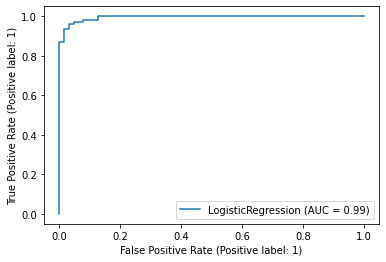

In [27]:
plot_roc_curve(lr_b_cancer, X_test, Y_test)